# Challenge - Handle outliers and perform encoding

## Part 1 - detect and handle outliers - Ubers fare dataset  (uber.csv)
- Detect outliers in `fare amount` using an appropriate method and replace it with the median.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [65]:
df=pd.read_csv("E:/GUC/Sem 9/(NETW908) Data Engineering/Week 4/4 - Lab 3 Outliers and data transformation (Lab manual)/uber.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [66]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [67]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [69]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [70]:
df.fare_amount.skew()

4.504846860602114

{'whiskers': [<matplotlib.lines.Line2D at 0x1ac1d723450>,
 'caps': [<matplotlib.lines.Line2D at 0x1ac1d72c890>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ac1d722c90>],
 'medians': [<matplotlib.lines.Line2D at 0x1ac1d72d690>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ac1d72dfd0>],
 'means': []}

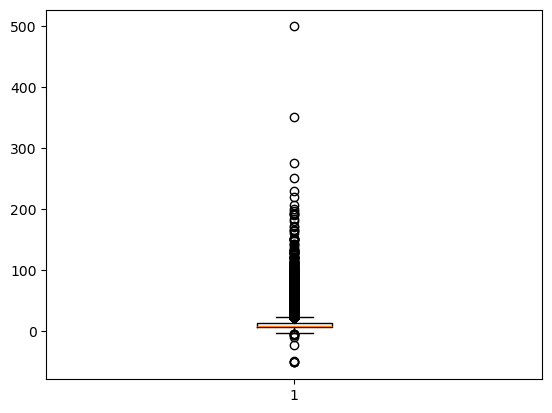

In [71]:
plt.boxplot(df['fare_amount'])

C:\Users\Amora\AppData\Local\Temp\ipykernel_29400\2772932758.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fare_amount'])


<Axes: xlabel='fare_amount', ylabel='Density'>

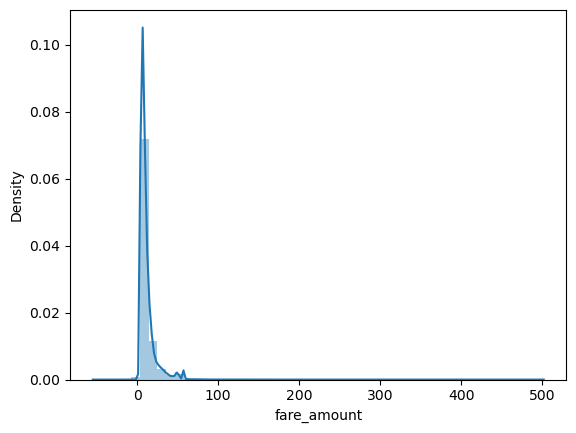

In [72]:
sns.distplot(df['fare_amount'])

- since the distribution is not normal so we revert to the IQR methode when handling the ouliers

In [74]:
# first get the IQR value then apply the rule
Q1 = df.fare_amount.quantile(0.25)
Q3 = df.fare_amount.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

6.5


In [75]:
# Anything above the upper limit or lower than the lower limit is an outlier
cut_off = IQR * 1.5
lower = Q1 - cut_off
upper =  Q3 + cut_off
lower,upper

(-3.75, 22.25)

In [76]:
u = df[df['fare_amount']> upper]
l = df[df['fare_amount'] < lower]
print('Total number of outliers are', u.shape[0]+ l.shape[0])

Total number of outliers are 17167


In [77]:
df.fare_amount.median()

8.5

In [78]:
df.loc[df['fare_amount'] < lower, 'fare_amount'] = df.fare_amount.median()
df.loc[df['fare_amount'] > upper, 'fare_amount'] = df.fare_amount.median()

df_IQR = df
df_IQR.shape

(200000, 9)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ac185eddd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ac185ef190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ac185ed550>],
 'medians': [<matplotlib.lines.Line2D at 0x1ac185eff50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ac185dc810>],
 'means': []}

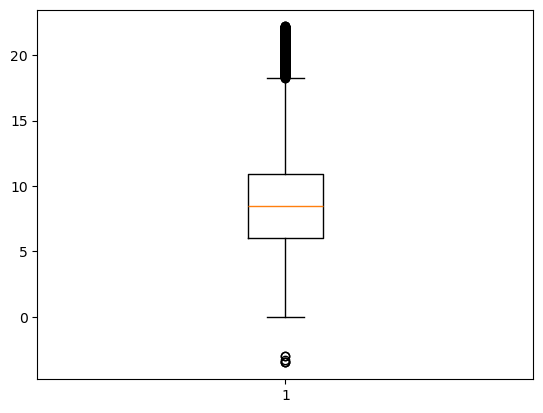

In [79]:
plt.boxplot(df_IQR['fare_amount'])

C:\Users\Amora\AppData\Local\Temp\ipykernel_29400\1162164254.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_IQR['fare_amount'])


<Axes: xlabel='fare_amount', ylabel='Density'>

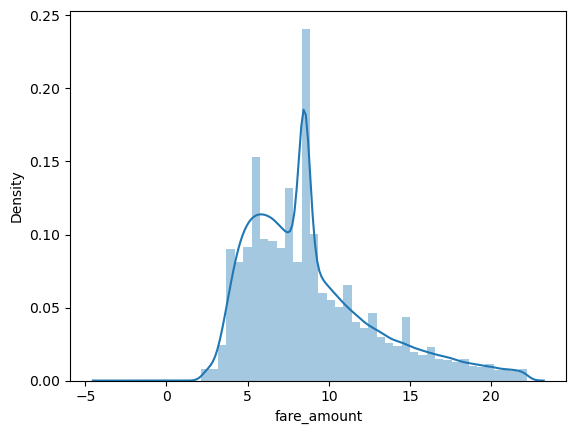

In [80]:
sns.distplot(df_IQR['fare_amount'])

## Part 2 - encode the categorcial features in flights.csv dataset

About the dataset: It contains information about all flights that departed from the two major airports of the Pacific Northwest (PNW), SEA in Seattle and PDX in Portland, in 2014: 162,049 flights in total.

- 2.1: Use appropriate encoding methods on the categorical attributes for the dataframe. Make sure that all the columns are numerical at the end of your implementation. Use at least two encoding methods and choose the method that is appropriate to the column you are encoding.

In [83]:
df=pd.read_csv("E:/GUC/Sem 9/(NETW908) Data Engineering/#Datasets (Supplementary notes)/flights.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [84]:
df.head()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  17048 non-null  int64  
 1   year        17048 non-null  int64  
 2   month       17048 non-null  int64  
 3   day         17048 non-null  int64  
 4   dep_time    17048 non-null  float64
 5   dep_delay   17048 non-null  float64
 6   arr_time    17048 non-null  float64
 7   arr_delay   17048 non-null  float64
 8   carrier     17048 non-null  object 
 9   tailnum     17048 non-null  object 
 10  flight      17048 non-null  int64  
 11  origin      17048 non-null  object 
 12  dest        17048 non-null  object 
 13  air_time    17048 non-null  float64
 14  distance    17048 non-null  int64  
 15  hour        17048 non-null  float64
 16  minute      17047 non-null  float64
dtypes: float64(7), int64(6), object(4)
memory usage: 2.2+ MB


In [86]:
df.isna().sum()

Unnamed: 0    0
year          0
month         0
day           0
dep_time      0
dep_delay     0
arr_time      0
arr_delay     0
carrier       0
tailnum       0
flight        0
origin        0
dest          0
air_time      0
distance      0
hour          0
minute        1
dtype: int64

In [87]:
df.describe(include=object)

,carrier,tailnum,origin,dest
count,17048,17048,17048,17048
unique,11,2509,2,66
top,AS,N218AG,SEA,SFO
freq,6670,102,11180,1437


In [109]:
# Carrier column & origin column

df_new = pd.get_dummies(df, columns=['origin'], drop_first=False)
print(df_new.dtypes)

Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
origin_PDX       bool
origin_SEA       bool
dtype: object


In [111]:
df_new = df_new.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)

In [30]:
# Tailnum column & dest column

label_encoder = LabelEncoder()
df_new['tailnum'] = label_encoder.fit_transform(df_new['tailnum'])
df_new['dest'] = label_encoder.fit_transform(df_new['dest'])
df_new['carrier'] = label_encoder.fit_transform(df_new['carrier'])


In [31]:
df_new.head()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,tailnum,flight,dest,air_time,distance,hour,minute,origin_PDX,origin_SEA,carrier_AA,carrier_AS,carrier_B6,carrier_DL,carrier_F9,carrier_HA,carrier_OO,carrier_UA,carrier_US,carrier_VX,carrier_WN
0,0,2014,1,1,1.0,96.0,235.0,70.0,1108,145,1,194.0,1542,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,1,2014,1,1,4.0,-6.0,738.0,-23.0,117,1830,9,252.0,2279,0.0,4.0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,2,2014,1,1,8.0,13.0,548.0,-4.0,476,1609,25,201.0,1825,0.0,8.0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,3,2014,1,1,28.0,-2.0,800.0,-23.0,1215,466,9,251.0,2282,0.0,28.0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,4,2014,1,1,34.0,44.0,325.0,43.0,1904,121,1,201.0,1448,0.0,34.0,0,1,0,1,0,0,0,0,0,0,0,0,0


- 2.2: **very shortly, justify your choice of encoding method for each attribute.**


In [33]:
df.describe(include=object)

,carrier,tailnum,origin,dest
count,17048,17048,17048,17048
unique,11,2509,2,66
top,AS,N218AG,SEA,SFO
freq,6670,102,11180,1437


- origin column
  - based on the no. unique entries of carrier and origin one hot encoding is used since it will not add many columns to the dataset
- Tailnum column & Carrier column & dest column
  - based on the no. unique entries of Tailnum , dest and Carrier. It was shown that they had many unique entries so adding more columns using one hot encoding won't
    be a good choice so label encoding was used.
